# Requirements

In [1]:
import matplotlib.pyplot as plt
import re

# Problem

The aim is to generate Conway's look-and-say sequence:

  * 1
  * 11
  * 21
  * 1211
  * 111221
  * 312211
  * 13112221
  * 1113213211
  * 31131211131221
  * ...

The sequence is generated by looking at the string, determining the length of sequences of identical characters, and replacing those by the count and the character.

# Implementation

It is easy to split a string into slices that consist of one or more of the same characters using regular expressions. The first part of the expression matches a digit and stores the match for future use (`(\d)`).  The second part matches zero or more occurences of the digit that was just matched, and stores it as well (`(\1*)`).  The resultting sequence of tuples contain a digit, followed by the remainder of the sequence, so the next string in Conway's look-and-say sequence is easy to construct.

In [2]:
def look_say(sequence):
    new_sequance = ''
    for match in re.findall(r'(\d)(\1*)', sequence):
        new_sequance += f'{str(1 + len(match[1]))}{match[0]}'
    return new_sequance

For convenience, a generator  is defined to generate the sequence up to any number of elements.

In [3]:
def look_and_say_sequence():
    s = '1'
    yield s
    while True:
        s = look_say(s)
        yield s

In [4]:
seq = look_and_say_sequence()
for _ in range(10):
    print(next(seq))

1
11
21
1211
111221
312211
13112221
1113213211
31131211131221
13211311123113112211


We can check how many digits the sequence has for the first 200 elements in the sequence.

In [5]:
nr_elements = 50

In [8]:
lengths = []
seq = look_and_say_sequence()
for _ in range(nr_elements):
    lengths.append(len(next(seq)))

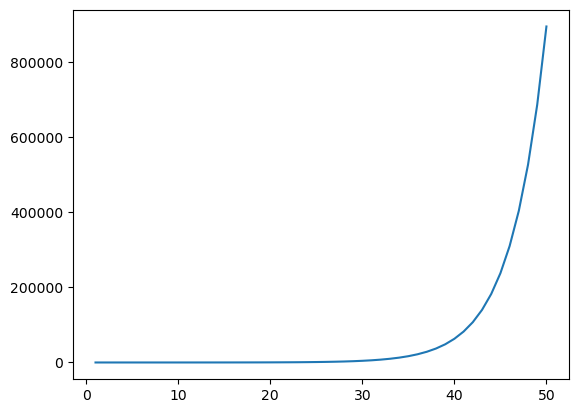

In [11]:
plt.plot(list(range(1, nr_elements + 1)), lengths);

It is clear that the length of the elements of the sequence is growing exponentially.